<a href="https://colab.research.google.com/github/XEQTER5/SLS_CallDataAssesment/blob/main/SLS_CallDataAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data Set






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('future.no_silent_downcasting', True)

In [2]:
df = pd.read_csv('/content/call_data_assessment.csv',engine='python',on_bad_lines='skip')

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 304382
Number of columns: 48


In [3]:
#print(dataframe.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304382 entries, 0 to 304381
Data columns (total 48 columns):
 #   Column                                                                                                                                                            Non-Null Count   Dtype  
---  ------                                                                                                                                                            --------------   -----  
 0   Client_ID                                                                                                                                                         304382 non-null  int64  
 1   Campaign_ID                                                                                                                                                       304382 non-null  int64  
 2   Household_ID                                                                                                        

# DATA CLEANING


In [4]:
To_be_Dropped = df.columns[df.isnull().all()].tolist()

print("Columns to be dropped:")
print(To_be_Dropped)
print(f"Number of completely empty columns: {len(To_be_Dropped)}")

# Explicitly exclude 'Gender' from being dropped
if 'Gender' in To_be_Dropped:
    To_be_Dropped.remove('Gender')

Cleaned_df = df.drop(columns=To_be_Dropped)
print("'Gender' column exists in Cleaned_df:", 'Gender' in Cleaned_df.columns)

Columns to be dropped:
['Call_ID', 'Patch_Number', 'Patch_Status', 'Patch_Duration', 'If_1_3__What_potential_disaster_or_emergency_are_you_most_worried_about_', 'If_4_5__What_specific_preparations_have_you_made_', 'If_4_5__What_are_the_top_reasons_that_motivated_you_to_get_prepared_', 'Thinking_about_actually_taking_steps_to_get_prepared_for_an_emergency__which_sources_of_information__people__or_organizations_would_motivate_you_to_take_action_', 'What_are_some_specific_challenges_you_face_being_a_decision_maker_preparing_for_emergencies_', 'Which_of_these_services_or_resources_could_the_State_provide_to_make_you_feel_more_supported_during_an_emergency_', 'Can_I_text_you_a_link_or_email_you_the_survey_to_complete_later_', 'Phone_Type', 'Account_Name']
Number of completely empty columns: 13
'Gender' column exists in Cleaned_df: True


In [5]:
Cleaned_df[Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].notnull()].head(5)

,Client_ID,Campaign_ID,Household_ID,HUBID,Pass__,Phone_Number,First_Name,Last_Name,Address_1,Address_2,...,Can_we_sign_you_up_for_Emergency_Service_Notifications_,What_are_some_of_your_conerns_,On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_,If_1_3__what_are_the_top_reasons_that_keep_you_from_being_more_prepared_,Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_,Where_did_you_see_or_hear_this_information_,What_was_the_most_important_part_of_the_information_you_saw_,Which_of_the_following_things_would_help_you_feel_more_prepared_for_a_natural_disaster_,Were_Tips_Provided_,Which_county_should_we_sign_you_up_for_
1829,4061,42121,10331,729979160,1,NaN,Patricia,Hill,521 Loleta Ln,"Novato, CA 94947",...,Yes,NaN,4.0,NaN,Yes,Social media,NaN,Monthly Newsletter about Disaster Preparedness,True,NaN
4153,4061,42121,3568,729979653,1,NaN,Marcia,Sprinkle,31 Pinheiro Cir F12,"Novato, CA 94945",...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4192,4061,42121,32862,729973138,1,NaN,Nancy,Fleming,186 Cazneau Ave,"Sausalito, CA 94965",...,No,Won't Disclose,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
4193,4061,42121,6587,729974194,1,NaN,Andra,Conroy,228 San Marin Dr,"Novato, CA 94945",...,No,Won't Disclose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4196,4061,42121,48256,729975698,1,NaN,Hanelye,Mazariegos,500 Adrian Way,"San Rafael, CA 94903",...,No,Won't Disclose,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


In [144]:
#identify and print how many missing values are there in each column

print("\nMissing values per column:")
print(Cleaned_df.isnull().sum())


Missing values per column:
Client_ID                                                                                                          0
Campaign_ID                                                                                                        0
Household_ID                                                                                                       0
HUBID                                                                                                              0
Pass__                                                                                                             0
Phone_Number                                                                                                       0
First_Name                                                                                                         0
Last_Name                                                                                                          0
Address_1                           

In [145]:
campaign_id_counts = Cleaned_df['Campaign_ID'].value_counts()
print("\nCounts of each unique Campaign_ID:")

household_id_counts = Cleaned_df['Household_ID'].value_counts()
#print("\nCounts of each unique Household_ID:")
#household_id_counts

unique_values = Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].unique()
print("\nUnique values in Can_we_sign_you_up_for_Emergency_Service_Notifications_:", unique_values)

Ethnicity_unique_values = Cleaned_df['Ethnicity'].unique()
print("\nUnique values in Ethnicity:", Ethnicity_unique_values)

unique_values_What_are_some_of_your_conerns_ = Cleaned_df['What_are_some_of_your_conerns_'].unique()
print("\nUnique values in What_are_some_of_your_conerns_:", unique_values_What_are_some_of_your_conerns_)


DateTime  = Cleaned_df['DateTime'].unique()
print("\nUnique values in DateTime:", DateTime)

Reasons_unique_values = Cleaned_df['If_1_3__what_are_the_top_reasons_that_keep_you_from_being_more_prepared_'].unique()
print("\nUnique values in If_1_3__what_are_the_top_reasons_that_keep_you_from_being_more_prepared_:", Reasons_unique_values)

concerns_counts = Cleaned_df['What_are_some_of_your_conerns_'].value_counts()
print("\nCounts of each unique What_are_some_of_your_conerns_:")
print(concerns_counts)

Gender_unique_values = Cleaned_df['Gender'].unique()
print("\nUnique values in Gender:", Gender_unique_values)

num_unique_hubids = Cleaned_df['HUBID'].nunique()
print(f"\nNumber of unique HUBIDs: {num_unique_hubids}")

# Print the unique HUBIDs
unique_hubids = Cleaned_df['HUBID'].unique()
print("\nUnique HUBIDs:")
unique_hubids

hubid_counts = Cleaned_df['HUBID'].value_counts()
multiple_occurrence_hubids = hubid_counts[hubid_counts > 1].index.tolist()

print("\nHUBIDs with more than 1 occurrence:")
print(multiple_occurrence_hubids)
print(f"Number of HUBIDs with more than 1 occurrence: {len(multiple_occurrence_hubids)}")


Counts of each unique Campaign_ID:

Unique values in Can_we_sign_you_up_for_Emergency_Service_Notifications_: ['No Response' 'Yes' 'No' "I'm Already Signed Up" 'Undecided']

Unique values in Ethnicity: ['II' 'AS' 'XX' 'Unknown' 'SS' 'CC' 'HH' 'JJ' 'BB' 'FF' 'GG' 'NN' 'PP'
 'DD' 'ZZ' 'RR' 'EE' 'YY' 'OO' 'VV' 'LL' 'WW' 'MM' 'KK' 'UU' 'AR' 'TT']

Unique values in What_are_some_of_your_conerns_: ['None' "Won't Disclose" 'Thinks they are prepared enough'
 "Don't want additional notifications" "Don't find them useful"
 "Doesn't want to be contacted by the Government"]

Unique values in DateTime: <DatetimeArray>
['2024-11-06 17:00:35', '2024-11-06 16:39:18', '2024-11-06 17:11:00',
 '2024-11-06 17:15:29', '2024-11-06 17:03:41', '2024-11-06 16:49:17',
 '2024-11-06 17:50:59', '2024-11-06 17:17:14', '2024-11-06 16:51:03',
 '2024-11-06 17:12:36',
 ...
 '2024-09-16 16:42:44', '2024-09-16 14:37:41', '2024-09-16 14:08:32',
 '2024-09-16 15:13:51', '2024-09-16 15:58:17', '2024-09-16 16:40:25',
 '2024-

In [155]:
Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'] = Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].replace("Im Already Signed Up", "I'm Already Signed Up")
Cleaned_df['Zip'] = Cleaned_df['Zip'].astype(float).astype(int).astype(str).str.zfill(5)


Cleaned_df['What_are_some_of_your_conerns_'] = Cleaned_df['What_are_some_of_your_conerns_'].replace({
    'Wont Disclose': "Won't Disclose",
    'Dont want additional notifications': "Don't want additional notifications",
    'Dont find them useful': "Don't find them useful",
    'Doesnt want to be contacted by the government':"Doesn't want to be contacted by the Government"
})

# Verify the changes
unique_concerns_after = Cleaned_df['What_are_some_of_your_conerns_'].unique()
print("\nUnique values in 'What_are_some_of_your_conerns_' after replacement:")

unique_concerns_after


Unique values in 'What_are_some_of_your_conerns_' after replacement:


array(['None', "Won't Disclose", 'Thinks they are prepared enough',
       "Don't want additional notifications", "Don't find them useful",
       "Doesn't want to be contacted by the Government"], dtype=object)

In [10]:
# Fill missing values using HUBID for customer-specific columns
def fill_missing_by_hubid(df, column):
    # For each HUBID, fill missing values with the first non-null value in the group
    df[column] = df.groupby('HUBID')[column].transform(lambda x: x.ffill().bfill())
    return df

In [422]:
hubid_fill_cols = ['Phone_Number', 'First_Name', 'Address_1', 'Zip', 'Age', 'Ethnicity']
for col in hubid_fill_cols:
    Cleaned_df = fill_missing_by_hubid(Cleaned_df, col)

KeyboardInterrupt: 

In [423]:
missing_before_hubid = df[hubid_fill_cols].isnull().sum()
missing_after_hubid = Cleaned_df[hubid_fill_cols].isnull().sum()

comparison = pd.concat(
    [missing_before_hubid.rename("Missing_Before"),
     missing_after_hubid.rename("Missing_After")],
    axis=1
)

print(comparison)

              Missing_Before  Missing_After
Phone_Number          291903         291903
First_Name                11             11
Address_1                 28             28
Zip                        6              6
Age                      434            434
Ethnicity              47338          47338


In [11]:
Cleaned_df['Phone_Number'] = Cleaned_df['Phone_Number'].fillna('Unknown')
Cleaned_df['First_Name'] = Cleaned_df['First_Name'].fillna('Unknown')
Cleaned_df['Address_1'] = Cleaned_df['Address_1'].fillna('Unknown')
Cleaned_df['Zip'] = Cleaned_df['Zip'].fillna(Cleaned_df['Zip'].mode()[0])
Cleaned_df['Age'] = Cleaned_df['Age'].fillna(Cleaned_df['Age'].median())
Cleaned_df['Ethnicity'] = Cleaned_df['Ethnicity'].fillna('Unknown')

In [12]:
Cleaned_df['Agent_Session_Number'] = Cleaned_df['Agent_Session_Number'].fillna('Unknown')
Cleaned_df['Agent'] = Cleaned_df['Agent'].fillna('Unknown')
Cleaned_df['Agent_Email_ID'] = Cleaned_df['Agent_Email_ID'].fillna('Unknown')
Cleaned_df['Notes'] = Cleaned_df['Notes'].fillna('None')
Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'] = Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].fillna('No Response')
Cleaned_df['What_are_some_of_your_conerns_'] = Cleaned_df['What_are_some_of_your_conerns_'].fillna('None')
Cleaned_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'] = Cleaned_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'].fillna(0)
Cleaned_df['If_1_3__what_are_the_top_reasons_that_keep_you_from_being_more_prepared_'] = Cleaned_df['If_1_3__what_are_the_top_reasons_that_keep_you_from_being_more_prepared_'].fillna('None')
Cleaned_df['Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_'] = Cleaned_df['Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_'].fillna('No Response')
Cleaned_df['Where_did_you_see_or_hear_this_information_'] = Cleaned_df['Where_did_you_see_or_hear_this_information_'].fillna('None')
Cleaned_df['What_was_the_most_important_part_of_the_information_you_saw_'] = Cleaned_df['What_was_the_most_important_part_of_the_information_you_saw_'].fillna('None')
Cleaned_df['Which_of_the_following_things_would_help_you_feel_more_prepared_for_a_natural_disaster_'] = Cleaned_df['Which_of_the_following_things_would_help_you_feel_more_prepared_for_a_natural_disaster_'].fillna('None')
Cleaned_df['Were_Tips_Provided_'] = Cleaned_df['Were_Tips_Provided_'].fillna('No')
Cleaned_df['Which_county_should_we_sign_you_up_for_'] = Cleaned_df['Which_county_should_we_sign_you_up_for_'].fillna('Unknown')

In [17]:
missing_after = Cleaned_df[hubid_fill_cols].isnull().sum()
missing_after


NameError: name 'hubid_fill_cols' is not defined

In [14]:
Cleaned_df['DateTime'] = pd.to_datetime(Cleaned_df['Date'] + ' ' + Cleaned_df['Time'], errors='coerce')

print(Cleaned_df['DateTime'].head())

0   2024-11-06 17:00:35
1   2024-11-06 16:39:18
2   2024-11-06 17:11:00
3   2024-11-06 17:15:29
4   2024-11-06 17:03:41
Name: DateTime, dtype: datetime64[ns]


In [15]:
Cleaned_df = Cleaned_df.drop(columns=['Date', 'Time'])

print(Cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304382 entries, 0 to 304381
Data columns (total 34 columns):
 #   Column                                                                                                          Non-Null Count   Dtype         
---  ------                                                                                                          --------------   -----         
 0   Client_ID                                                                                                       304382 non-null  int64         
 1   Campaign_ID                                                                                                     304382 non-null  int64         
 2   Household_ID                                                                                                    304382 non-null  int64         
 3   HUBID                                                                                                           304382 non-null  int64     

In [199]:
Cleaned_df = Cleaned_df.rename(columns={'What_are_some_of_your_conerns_': 'What_are_some_of_your_concerns_'})

# Verify the column name change
print("\nColumn names after rename:")
print(Cleaned_df.columns.tolist())


Column names after rename:
['Client_ID', 'Campaign_ID', 'Household_ID', 'HUBID', 'Pass__', 'Phone_Number', 'First_Name', 'Last_Name', 'Address_1', 'Address_2', 'Zip', 'Voter_ID', 'Age', 'County', 'Ethnicity', 'Gender', 'Party', 'Status', 'Agent_Session_Number', 'Agent', 'Agent_Email_ID', 'Call_Duration', 'Notes', 'Can_we_sign_you_up_for_Emergency_Service_Notifications_', 'What_are_some_of_your_concerns_', 'On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_', 'If_1_3__what_are_the_top_reasons_that_keep_you_from_being_more_prepared_', 'Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_', 'Where_did_you_see_or_hear_this_information_', 'What_was_the_most_important_part_of_the_information_you_saw_', 'Which_of_the_following_things_would_help_you_feel_more_prepared_for_a_natural_disaster_', 'Were_Tips_Provided_', 'Which_county_should_we_sign_you_up_for_', 'DateTime', 'Age_Group', 'DATE', 'Month', 'Preparedness_Info_Respon

# Analysis: Targeting Patterns

In [156]:

age_bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49,
            54, 59, 64, 69, 74, 79, 84, 150]  # 150 as upper bound for 85+
age_labels = [
    'Age_0_4', 'Age_5_9', 'Age_10_14', 'Age_15_19', 'Age_20_24', 'Age_25_29',
    'Age_30_34', 'Age_35_39', 'Age_40_44', 'Age_45_49', 'Age_50_54', 'Age_55_59',
    'Age_60_64', 'Age_65_69', 'Age_70_74', 'Age_75_79', 'Age_80_84', 'Age_85_Plus']

Cleaned_df['Age_Group'] = pd.cut(Cleaned_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
age_distribution = Cleaned_df['Age_Group'].value_counts(normalize=True)
gender_distribution = Cleaned_df['Gender'].value_counts(normalize=True)
ethnicity_distribution = Cleaned_df['Ethnicity'].value_counts(normalize=True).head(5)
party_distribution = Cleaned_df['Party'].value_counts(normalize=True)


In [157]:
# Geographic Distribution
county_distribution = Cleaned_df['County'].value_counts(normalize=True).head(5)
zip_distribution = Cleaned_df['Zip'].value_counts(normalize=True).head(10)

In [158]:
# 3. Campaign Engagement
signup_rate = Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True)
call_duration_by_county = Cleaned_df.groupby('County')['Call_Duration'].mean().head(5)
signup_by_age = Cleaned_df.groupby('Age_Group')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)
signup_by_gender = Cleaned_df.groupby('Gender')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)

/tmp/ipython-input-158-3696489563.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  signup_by_age = Cleaned_df.groupby('Age_Group')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)


In [163]:
ethnicity_counts = Cleaned_df['Ethnicity'].value_counts(dropna=False)
#ethnicity_counts

gender_counts = Cleaned_df['Gender'].value_counts(dropna=False)
#gender_counts

Age_Group_counts = Cleaned_df['Age_Group'].value_counts(dropna=False).sort_values(ascending=True)
#Age_Group_counts

Zip_counts = Cleaned_df['Zip'].value_counts(dropna=False)
#Zip_counts.head()


In [164]:
Cleaned_df.head(5)

,Client_ID,Campaign_ID,Household_ID,HUBID,Pass__,Phone_Number,First_Name,Last_Name,Address_1,Address_2,...,Month,Preparedness_Info_Response,Preparedness_Info,Row_Count,Preparedness_Sentiment,Concern_Sentiment,Signup_Sentiment,Awareness_Sentiment,Age_Bin,What_are_some_of_your_conecrns_
0,4061,42121,52,729977811,1,Unknown,Samantha,Banducci,1820 Shoreline Hwy,"Muir Beach, CA 94965",...,2024-11,No Response,No Response,1,Negative,Neutral,Neutral,Neutral,19-35,None
1,4061,42121,54,729980997,1,Unknown,Deirdre,Kidder,252 Donahue St,"Marin City, CA 94965",...,2024-11,No Response,No Response,1,Negative,Neutral,Neutral,Neutral,61+,None
2,4061,42121,146,729976982,1,Unknown,Nichole,Vogler,137 Marine View Dr,"Dillon Beach, CA 94929",...,2024-11,No Response,No Response,1,Negative,Neutral,Neutral,Neutral,36-60,None
3,4061,42121,177,729976136,1,Unknown,Christine,Whitten,112 Mesa Rd,"Point Reyes Station, CA 94956",...,2024-11,No Response,No Response,1,Negative,Neutral,Neutral,Neutral,36-60,None
4,4061,42121,324,729977950,1,Unknown,Patricia,Joanides,299 Railroad Ave,"Woodacre, CA 94973",...,2024-11,No Response,No Response,1,Negative,Neutral,Neutral,Neutral,61+,None


# Visualizations


Visualizing the Distributions of Age, Gender and Counties



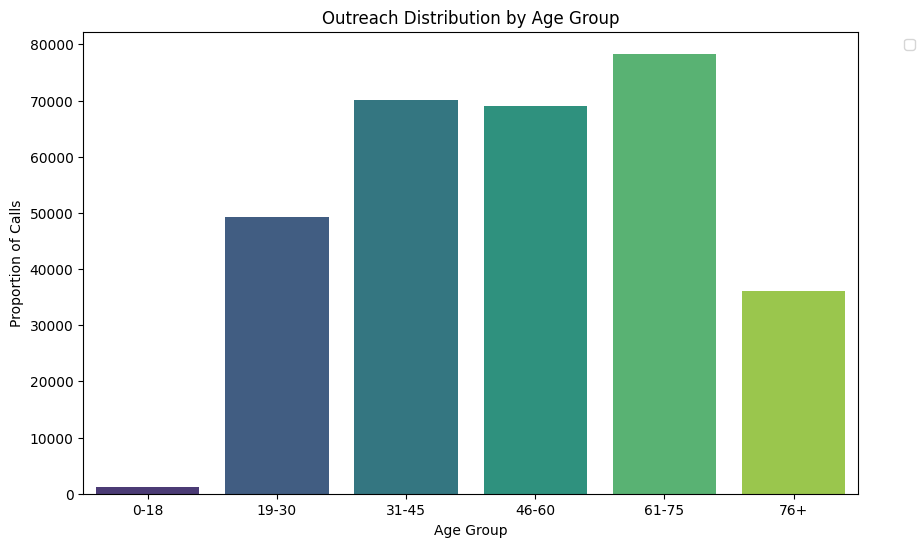

In [ ]:
# Plot 1: Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=Cleaned_df, x='Age_Group', hue='Age_Group', palette='viridis', legend=False)
plt.title('Outreach Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


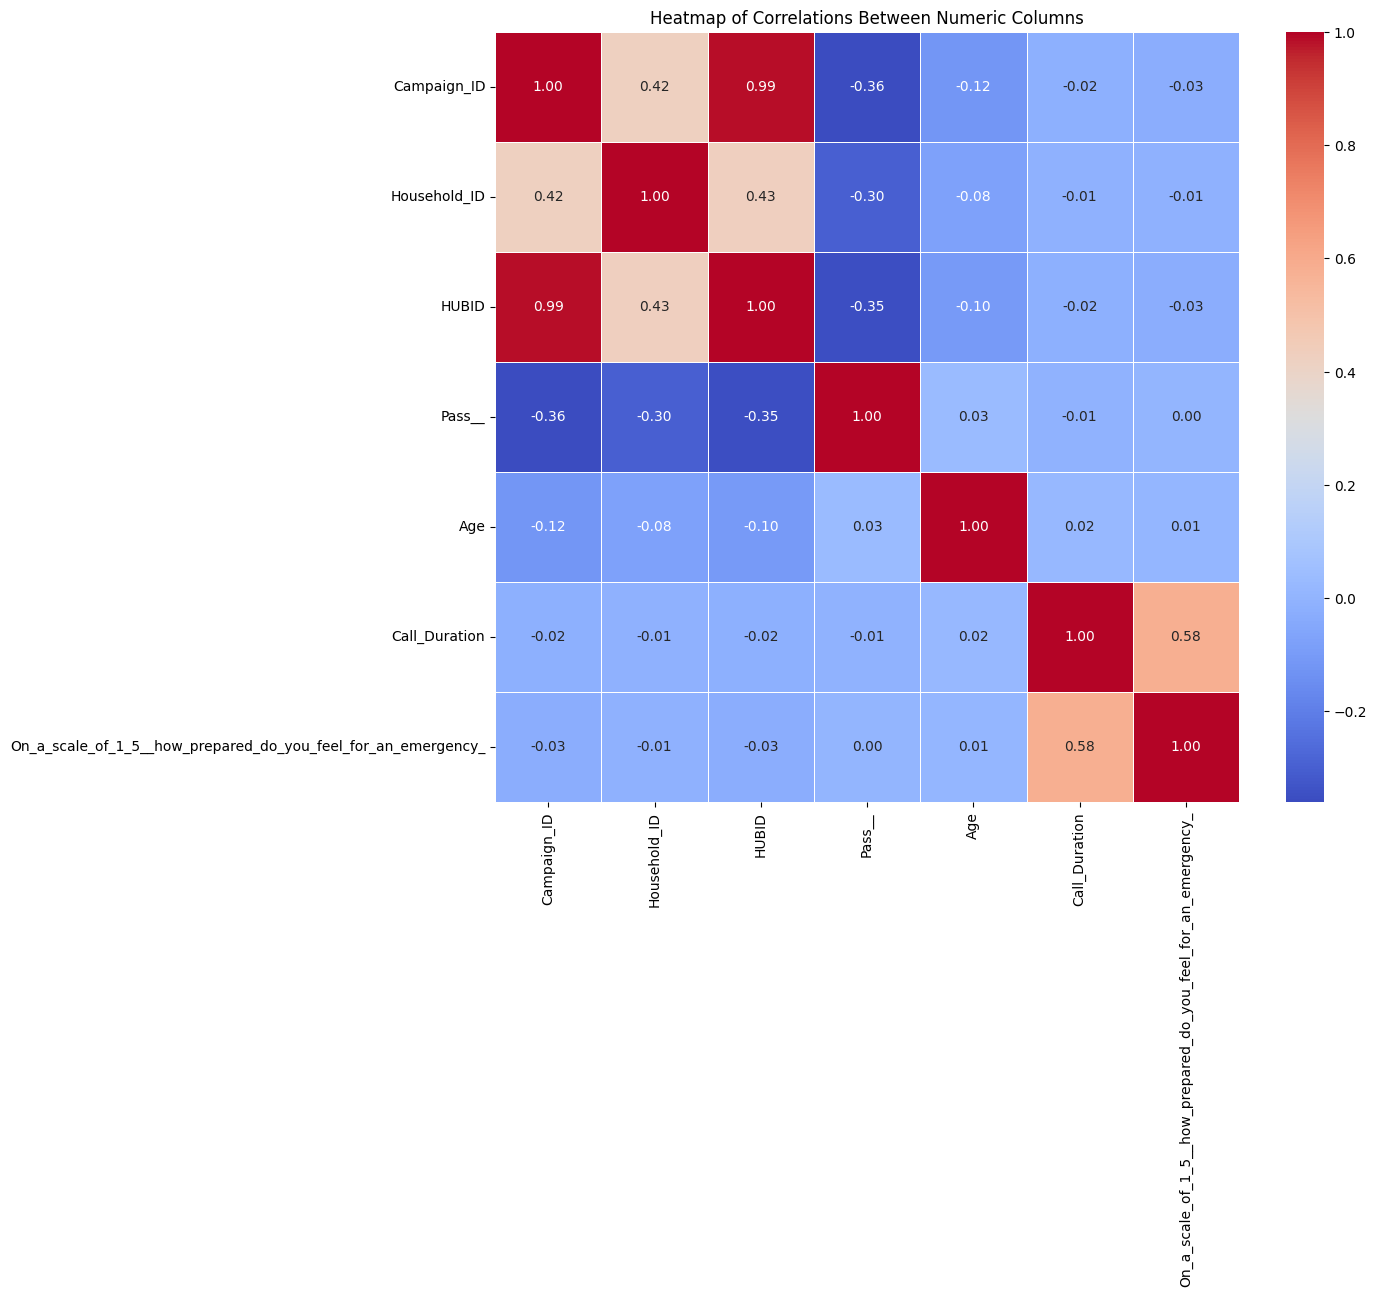

In [134]:
numeric_df = Cleaned_df.select_dtypes(include=np.number)
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]
numeric_df = numeric_df.dropna(axis=1, how='all')
correlation_matrix = numeric_df.corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlations Between Numeric Columns')
plt.show()


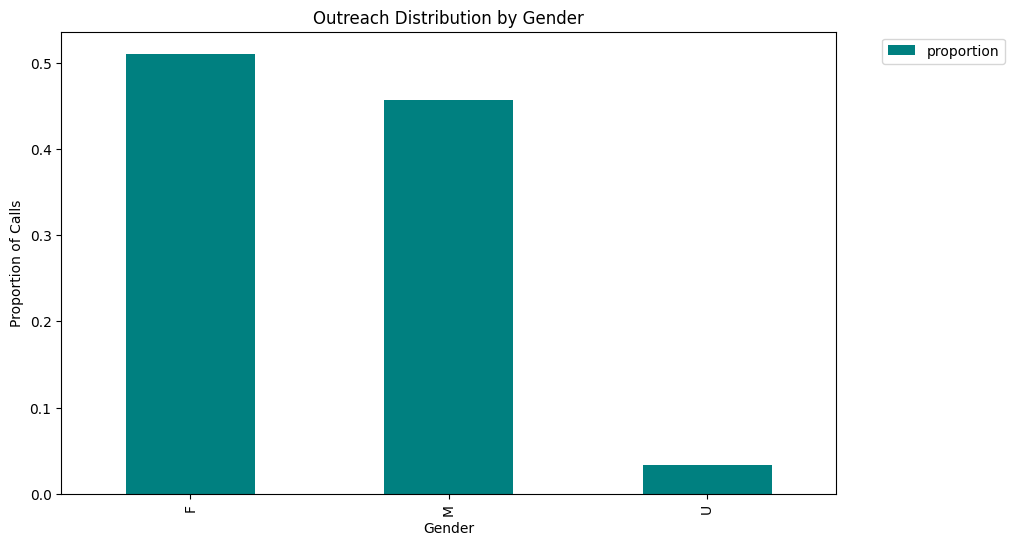

In [107]:
# Plot 2: Gender Distribution
plt.figure(figsize=(10, 6))
gender_dist = Cleaned_df['Gender'].value_counts(normalize=True)
gender_dist.plot(kind='bar', color='teal')
plt.title('Outreach Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('/content/gender_distribution.png')
#plt.close()

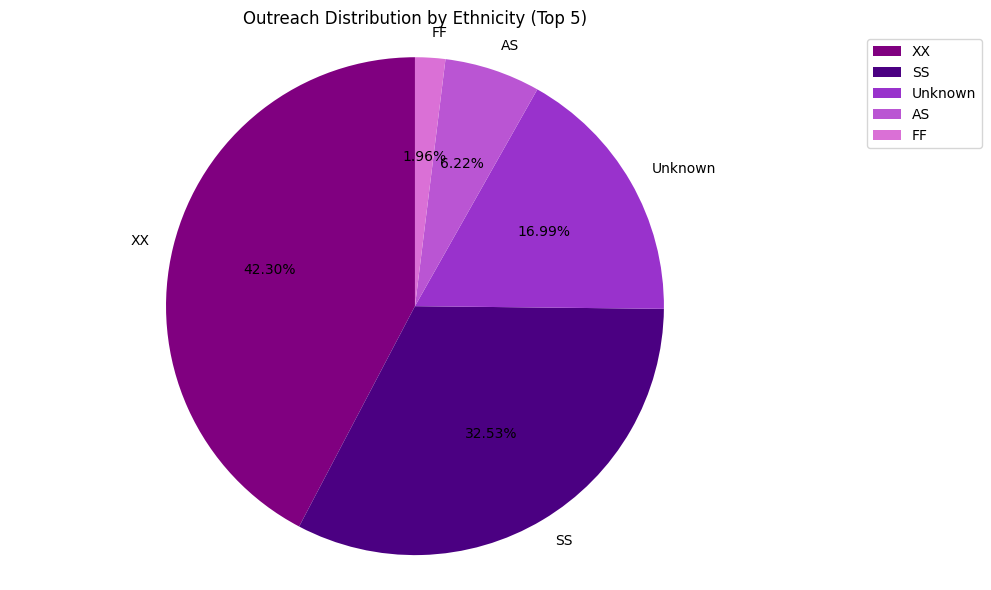

In [ ]:
# Plot 3: Ethnicity Distribution (Top 10 for readability)

plt.figure(figsize=(10, 6))
ethnicity_dist = Cleaned_df['Ethnicity'].value_counts(normalize=True).head(5)
colors = ['#800080', '#4B0082', '#9932CC', '#BA55D3', '#DA70D6']  # Purple-toned colors
plt.pie(ethnicity_dist, labels=ethnicity_dist.index, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Outreach Distribution by Ethnicity (Top 5)')
plt.legend(ethnicity_dist.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.show()

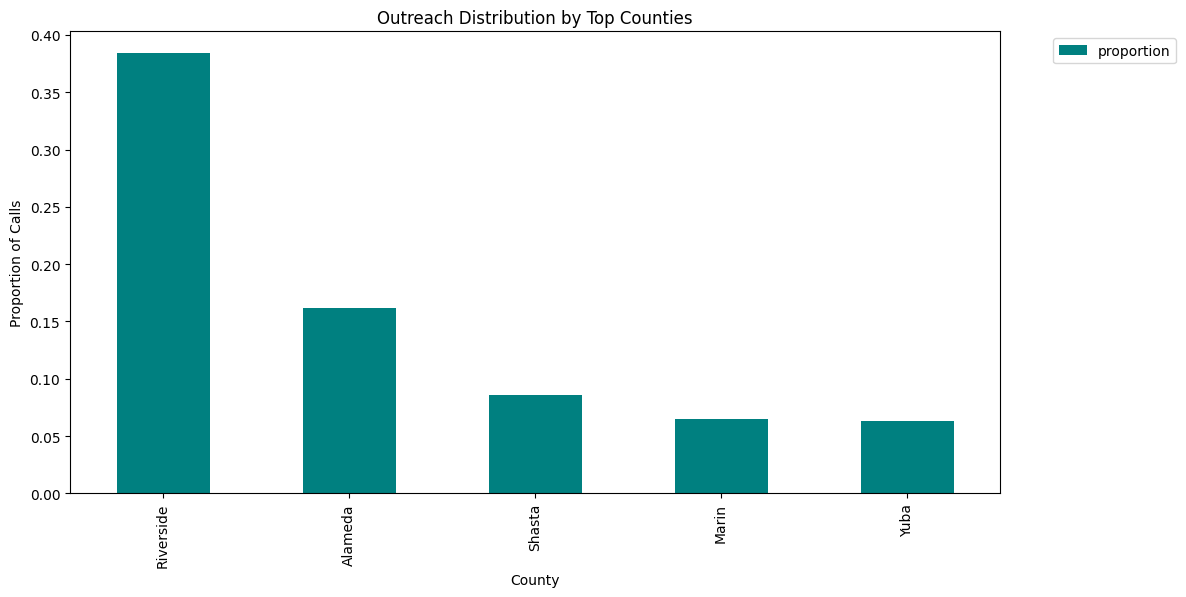

In [ ]:
# Plot 5: County Distribution (existing)
plt.figure(figsize=(12, 6))
county_distribution.plot(kind='bar', color='teal')
plt.title('Outreach Distribution by Top Counties')
plt.xlabel('County')
plt.ylabel('Proportion of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Calculate the Sign-up Rates for different parameters




<Figure size 1200x600 with 0 Axes>

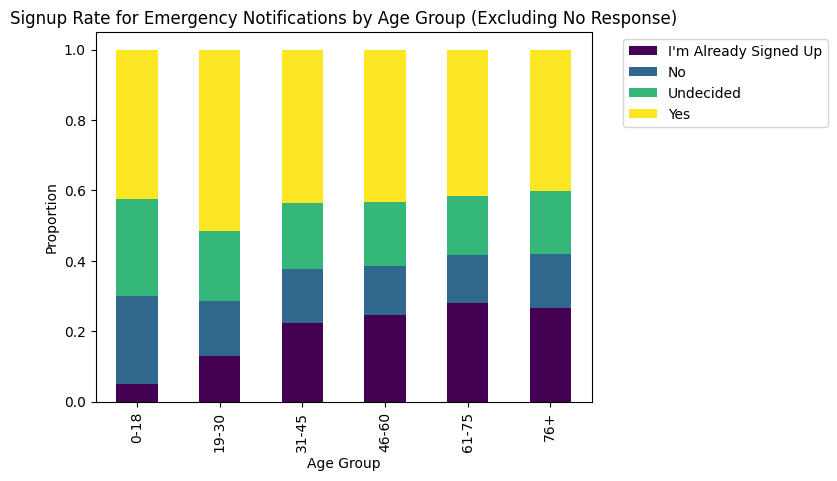

In [ ]:
# Plot 1: Signup Rate by Age Group (excluding 'No Response')
plt.figure(figsize=(12, 6))
signup_filtered = Cleaned_df[Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'] != 'No Response']
signup_by_age = signup_filtered.groupby('Age_Group')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)
signup_by_age.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Signup Rate for Emergency Notifications by Age Group (Excluding No Response)')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Signup Response')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


<Figure size 1000x600 with 0 Axes>

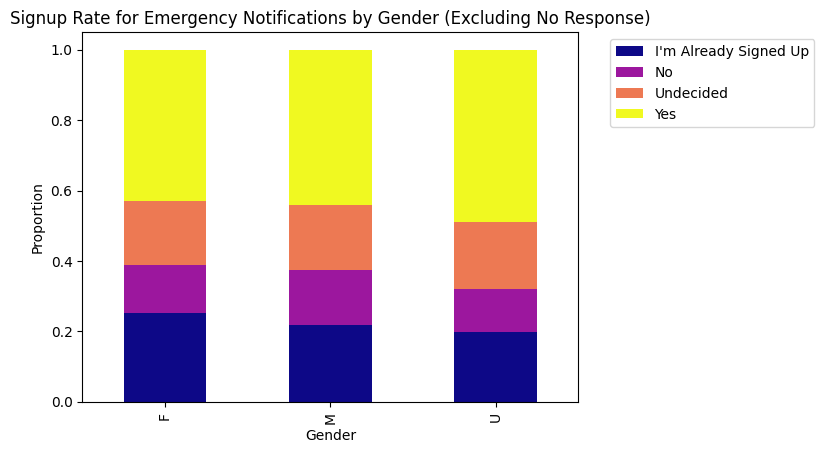

In [ ]:
# Plot 2: Signup Rate by Gender (excluding 'No Response')
plt.figure(figsize=(10, 6))
signup_by_gender = signup_filtered.groupby('Gender')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)
signup_by_gender.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Signup Rate for Emergency Notifications by Gender (Excluding No Response)')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Signup Response')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



<Figure size 1200x600 with 0 Axes>

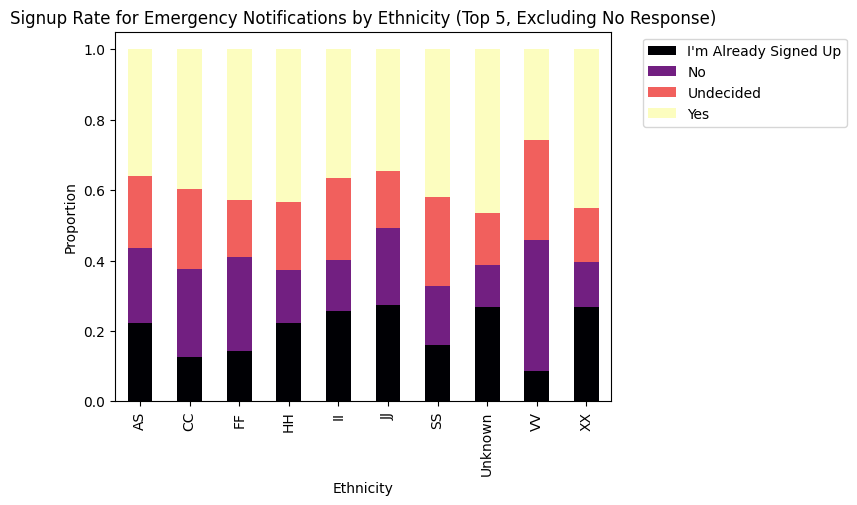

In [ ]:
# Plot 3: Signup Rate by Ethnicity (Top 5, excluding 'No Response')
plt.figure(figsize=(12, 6))
signup_by_ethnicity = signup_filtered[signup_filtered['Ethnicity'].isin(ethnicity_dist.index)].groupby('Ethnicity')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)
signup_by_ethnicity.plot(kind='bar', stacked=True, colormap='magma')
plt.title('Signup Rate for Emergency Notifications by Ethnicity (Top 5, Excluding No Response)')
plt.xlabel('Ethnicity')
plt.ylabel('Proportion')
plt.legend(title='Signup Response')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<Figure size 1000x600 with 0 Axes>

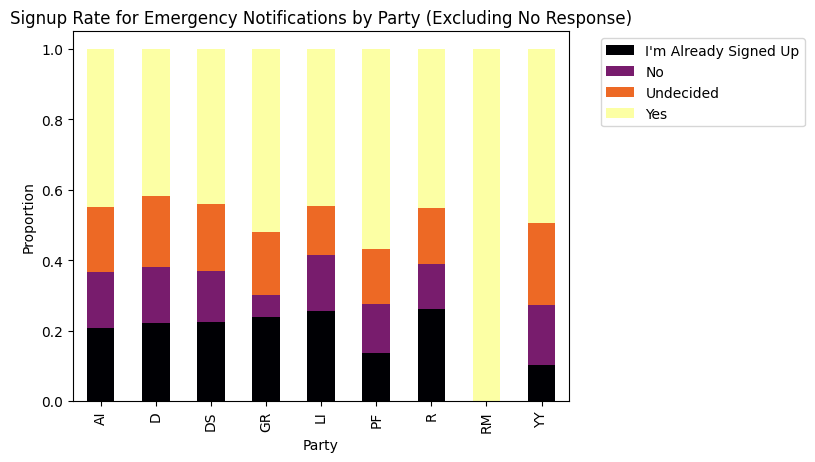

In [ ]:
# Plot 4: Signup Rate by Party (excluding 'No Response')
plt.figure(figsize=(10, 6))
signup_by_party = signup_filtered.groupby('Party')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)
signup_by_party.plot(kind='bar', stacked=True, colormap='inferno')
plt.title('Signup Rate for Emergency Notifications by Party (Excluding No Response)')
plt.xlabel('Party')
plt.ylabel('Proportion')
plt.legend(title='Signup Response')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<Figure size 1000x600 with 0 Axes>

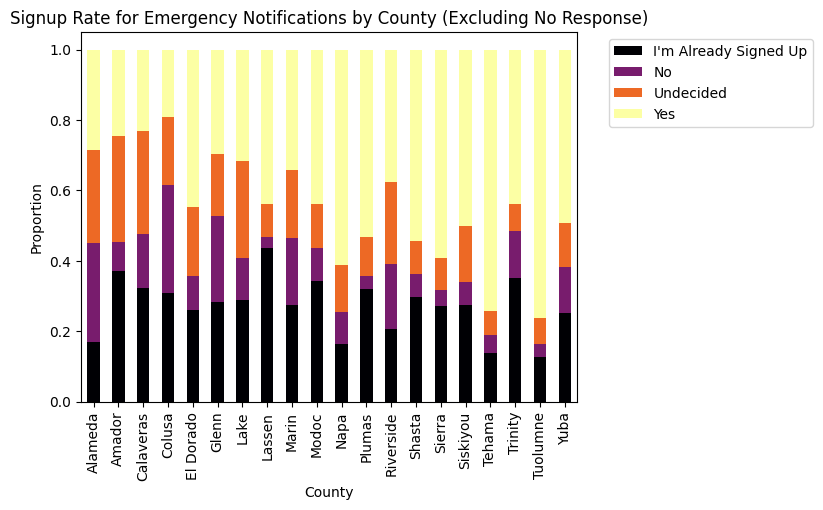

In [ ]:
# Plot 5: Signup Rate by County (excluding 'No Response')
plt.figure(figsize=(10, 6))
signup_by_party = signup_filtered.groupby('County')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)
signup_by_party.plot(kind='bar', stacked=True, colormap='inferno')
plt.title('Signup Rate for Emergency Notifications by County (Excluding No Response)')
plt.xlabel('County')
plt.ylabel('Proportion')
plt.legend(title='Signup Response')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<Figure size 1000x600 with 0 Axes>

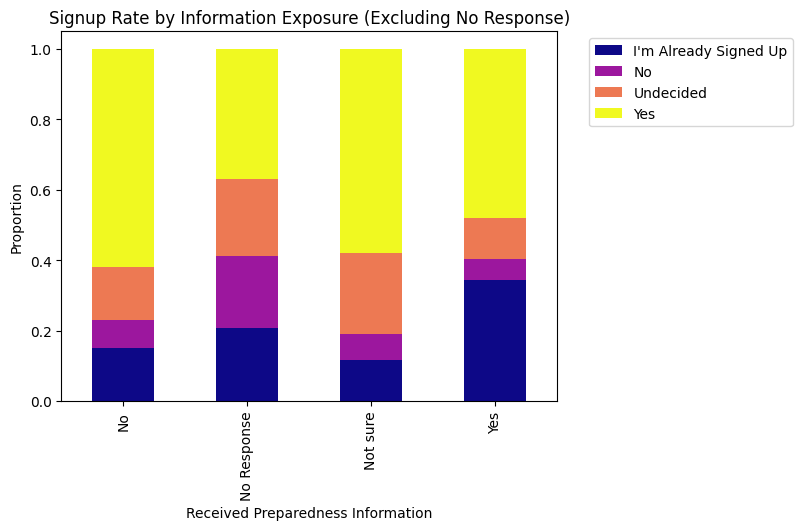

In [ ]:
# Plot 6: Signup Rate by Information Exposure (excluding 'No Response')
plt.figure(figsize=(10, 6))
info_filtered = Cleaned_df[Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'] != 'No Response']
signup_by_info = info_filtered.groupby('Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts(normalize=True).unstack().fillna(0)
signup_by_info.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Signup Rate by Information Exposure (Excluding No Response)')
plt.xlabel('Received Preparedness Information')
plt.ylabel('Proportion')
plt.legend(title='Signup Response')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('/content/signup_by_info_no_response_excluded.png')
#plt.close()

# Targeting Strategy 1 - Age

In [171]:
preparedness_by_age_group = pd.crosstab(
    Cleaned_df['Age_Group'],
    Cleaned_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'],
    margins=True,
    normalize='index'
).sort_index()

print("\nCross-tabulation of Age Group and Preparedness Score (Proportions within each age group):")
print(preparedness_by_age_group.to_markdown(numalign="left", stralign="left"))


older_age_groups = ['Age_65_69', 'Age_70_74', 'Age_75_79', 'Age_80_84', 'Age_85_Plus']
low_preparedness_scores = [1, 2, 3]


older_low_preparedness_df = Cleaned_df[
    Cleaned_df['Age_Group'].isin(older_age_groups) &
    Cleaned_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'].isin(low_preparedness_scores)
]

proportion_older_low_preparedness = len(older_low_preparedness_df) / len(Cleaned_df)

print(f"\nProportion of total contacts in older age groups (65+) with low preparedness (1-3): {proportion_older_low_preparedness:.2%}")

reasons_older_low_preparedness = older_low_preparedness_df['If_1_3__what_are_the_top_reasons_that_keep_you_from_being_more_prepared_'].value_counts(normalize=True).head()

print("\nTop reasons for low preparedness among older age groups (Proportions):")
print(reasons_older_low_preparedness.to_markdown(numalign="left", stralign="left"))

overall_tips_provided_prop = Cleaned_df['Were_Tips_Provided_'].value_counts(normalize=True).get('Yes', 0)

older_low_preparedness_tips_provided_prop = older_low_preparedness_df['Were_Tips_Provided_'].value_counts(normalize=True).get('Yes', 0)

proportion_older_total = Cleaned_df['Age_Group'].isin(older_age_groups).mean()
print(f"\nProportion of total contacts in older age groups (65+): {proportion_older_total:.2%}")




Cross-tabulation of Age Group and Preparedness Score (Proportions within each age group):
| Age_Group   | 0.0      | 1.0         | 2.0         | 3.0        | 4.0        | 5.0        |
|:------------|:---------|:------------|:------------|:-----------|:-----------|:-----------|
| Age_15_19   | 0.979707 | 0.00102749  | 0.00205497  | 0.00462368 | 0.00744927 | 0.00513743 |
| Age_20_24   | 0.98266  | 0.000990835 | 0.00168442  | 0.00406242 | 0.00624226 | 0.00435967 |
| Age_25_29   | 0.987742 | 0.000501276 | 0.00086584  | 0.00250638 | 0.00442034 | 0.00396464 |
| Age_30_34   | 0.988959 | 0.00063697  | 0.00110408  | 0.00161366 | 0.00369442 | 0.00399168 |
| Age_35_39   | 0.985684 | 0.000819283 | 0.00112112  | 0.00258721 | 0.0049157  | 0.00487258 |
| Age_40_44   | 0.987756 | 0.000687403 | 0.000730366 | 0.00214814 | 0.00446812 | 0.00421035 |
| Age_45_49   | 0.988016 | 0.000686091 | 0.00132644  | 0.00196679 | 0.00402507 | 0.00397933 |
| Age_50_54   | 0.987435 | 0.000577188 | 0.000399592 | 0.002486

The proportion 0.14% is calculated as the count of individuals in older age groups with low preparedness divided by the TOTAL number of contacts, not just those in the older age groups.


# Target Strategy 2 - Zip and County

In [177]:
county_zip_counts = Cleaned_df.groupby(['County', 'Zip']).size().reset_index(name='Contact_Count')

print("\nContact frequency by County and Zip (Top 10):")
print(county_zip_counts.sort_values(by='Contact_Count', ascending=False).head(10).to_markdown(numalign="left", stralign="left"))


county_counts = Cleaned_df['County'].value_counts().reset_index(name='Contact_Count')
county_counts = county_counts.rename(columns={'index': 'County'})

print("\nContact frequency by County:")
print(county_counts.to_markdown(index=False, numalign="left", stralign="left"))

top_n_counties = 5
top_counties = county_counts.head(top_n_counties)
proportion_in_top_counties = top_counties['Contact_Count'].sum() / len(Cleaned_df)

print(f"\nProportion of contacts in the top {top_n_counties} counties: {proportion_in_top_counties:.2%}")

concerns_by_county = Cleaned_df.groupby('County')['What_are_some_of_your_concerns_'].value_counts(normalize=True).unstack(fill_value=0)

print("\nProportion of concerns by County (Top 5 Counties):")
print(concerns_by_county.loc[top_counties['County']].head(5).to_markdown(numalign="left", stralign="left"))



Contact frequency by County and Zip (Top 10):
|     | County    | Zip   | Contact_Count   |
|:----|:----------|:------|:----------------|
| 193 | Riverside | 92201 | 12287           |
| 204 | Riverside | 92530 | 11388           |
| 209 | Riverside | 92544 | 9936            |
| 210 | Riverside | 92545 | 9668            |
| 336 | Yuba      | 95901 | 8139            |
| 1   | Alameda   | 94544 | 7530            |
| 196 | Riverside | 92236 | 7281            |
| 197 | Riverside | 92240 | 7262            |
| 346 | Yuba      | 95961 | 7207            |
| 194 | Riverside | 92220 | 6705            |

Contact frequency by County:
| County    | Contact_Count   |
|:----------|:----------------|
| Riverside | 116878          |
| Alameda   | 49349           |
| Shasta    | 26021           |
| Marin     | 19793           |
| Yuba      | 19174           |
| El Dorado | 16029           |
| Napa      | 11955           |
| Lake      | 10155           |
| Tehama    | 7297            |
| Calaveras | 7161 

Most contacts came from Riverside County, with over 116,000 messages.
The top 5 counties made up about 76% of all contacts.
Zip code 92201 in Riverside had the most messages (over 12,000).
In most counties, almost everyone was okay with being contacted.
Very few people said they didn’t want messages or found them unhelpful. This Strategy is further proved using External Data

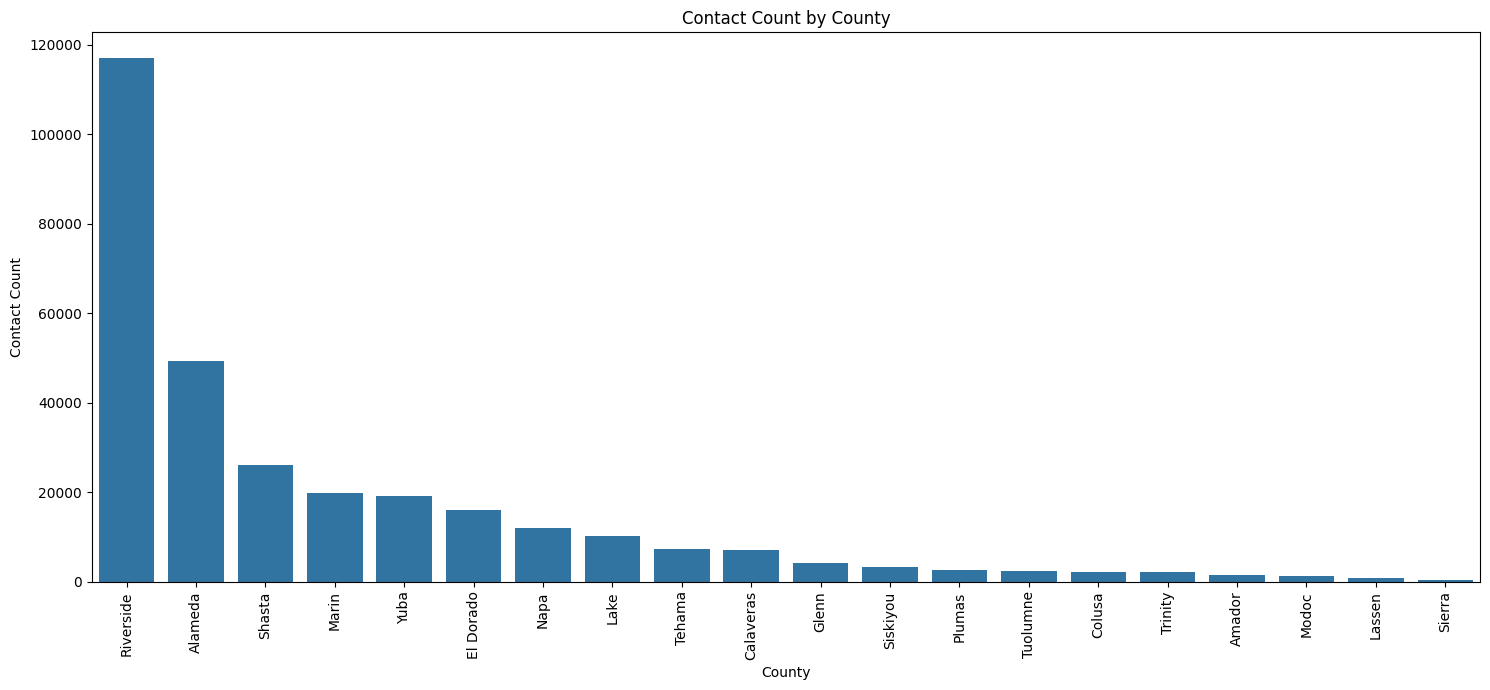

In [165]:
county_contact_counts = Cleaned_df['County'].value_counts().reset_index()
county_contact_counts.columns = ['County', 'Contact_Count']

county_contact_counts = county_contact_counts.sort_values(by='Contact_Count', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x='County', y='Contact_Count', data=county_contact_counts)
plt.title('Contact Count by County')
plt.xlabel('County')
plt.ylabel('Contact Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The skewed respresentation of the graph instantly represents the bais and which counties were targeted the most


Top 3 overall age groups: ['Age_65_69', 'Age_60_64', 'Age_70_74']

Top 3 Age Groups within the Top 5 Counties:
| County    | Age_Group   | Contact_Count   | rank_within_county   |
|:----------|:------------|:----------------|:---------------------|
| Alameda   | Age_30_34   | 4489            | 1                    |
| Alameda   | Age_35_39   | 4452            | 3                    |
| Alameda   | Age_60_64   | 4462            | 2                    |
| Marin     | Age_55_59   | 1902            | 3                    |
| Marin     | Age_60_64   | 1934            | 1                    |
| Marin     | Age_65_69   | 1917            | 2                    |
| Riverside | Age_25_29   | 11110           | 2                    |
| Riverside | Age_30_34   | 11469           | 1                    |
| Riverside | Age_35_39   | 10066           | 3                    |
| Shasta    | Age_60_64   | 2382            | 2                    |
| Shasta    | Age_65_69   | 2417            | 1             

<Figure size 1500x800 with 0 Axes>

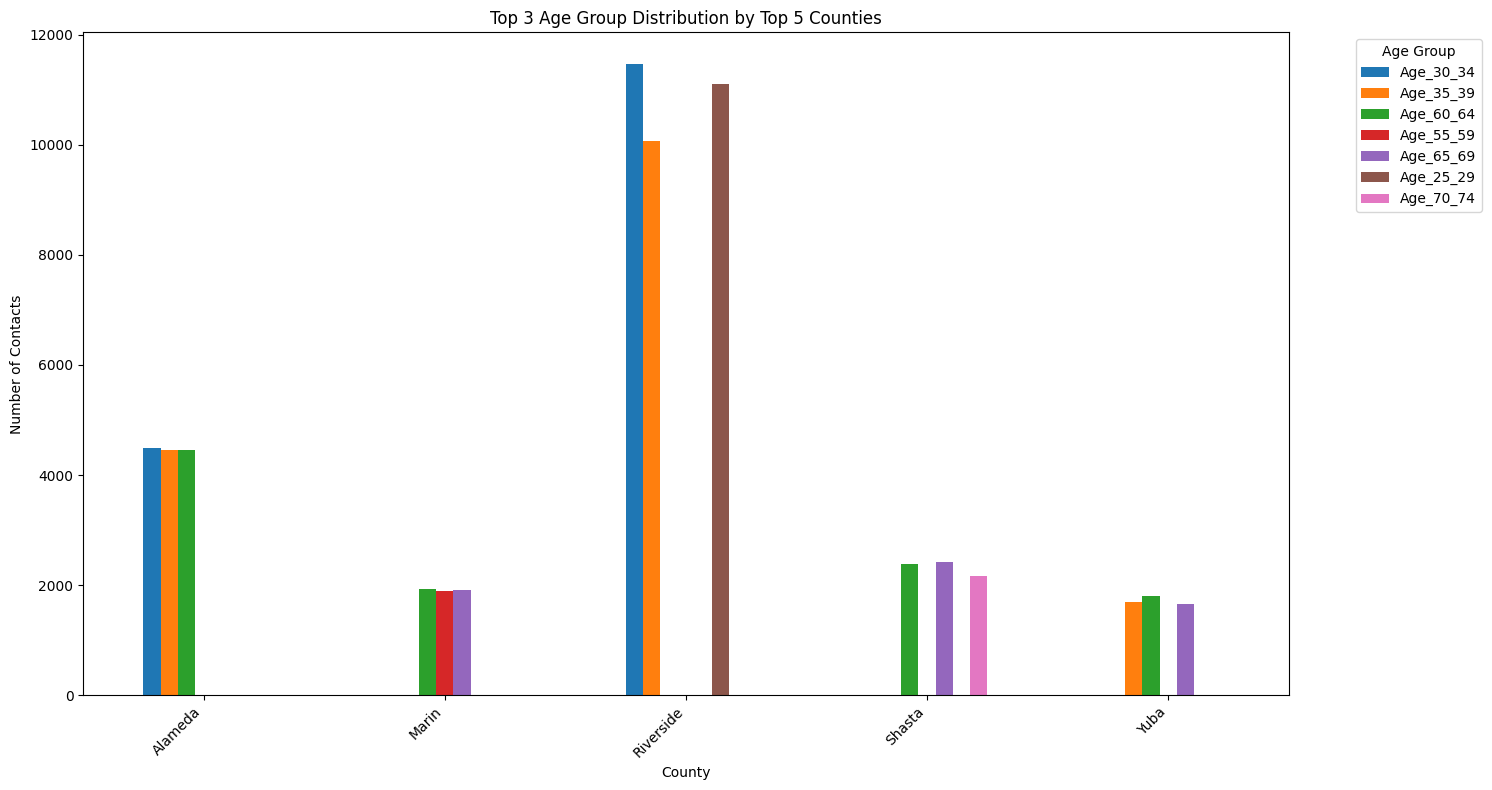

In [179]:
#Further analysis to find relation between gender and counties

top_3_overall_age_groups = Cleaned_df['Age_Group'].value_counts().head(3).index.tolist()
print(f"\nTop 3 overall age groups: {top_3_overall_age_groups}")

county_age_counts['rank_within_county'] = county_age_counts.groupby('County')['Contact_Count'].rank(method='first', ascending=False)
county_age_counts_top3 = county_age_counts[county_age_counts['rank_within_county'] <= 3]

print("\nTop 3 Age Groups within the Top 5 Counties:")
print(county_age_counts_top3.to_markdown(index=False, numalign="left", stralign="left"))


county_age_pivot_top3 = county_age_counts_top3.pivot(index='County', columns='Age_Group', values='Contact_Count').fillna(0)

plt.figure(figsize=(15, 8))
county_age_pivot_top3.plot(kind='bar', stacked=False, figsize=(15, 8))
plt.title('Top 3 Age Group Distribution by Top 5 Counties')
plt.xlabel('County')
plt.ylabel('Number of Contacts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Target Strategy 3 - Ethnic Groups

This is the analysis between Ethnicity by Preparedness Info Response

In [180]:
Cleaned_df['Row_Count'] = 1


Cleaned_df['Preparedness_Info'] = Cleaned_df['Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_'].replace(['No', 'Not sure'], 'No/Not sure')

ethnicity_info_pivot = Cleaned_df.pivot_table(
    index='Ethnicity',
    columns='Preparedness_Info',
    values='Row_Count',
    aggfunc='sum',
    fill_value=0
)


ethnicity_info_sorted = ethnicity_info_pivot.sort_values(by='No/Not sure', ascending=False)

#Results
print("Ethnicity Counts for Preparedness Information (No and Not sure merged, sorted by No/Not sure):")
print(ethnicity_info_sorted)

Ethnicity Counts for Preparedness Information (No and Not sure merged, sorted by No/Not sure):
Preparedness_Info  No Response  No/Not sure   Yes
Ethnicity                                        
XX                      116114          578  1151
SS                       89500          508   631
Unknown                  46705          216   417
AS                       17198           50    88
II                        5343           21    31
JJ                        3772           18    26
FF                        5429           12    12
HH                        2093            9    17
CC                        2434            7    12
EE                        1788            6     9
MM                         768            5     4
PP                        1548            5    11
YY                        1052            4     6
VV                        1852            4     7
LL                         781            3     4
WW                         431            2     3
NN   

Count Ethnicity for Low Preparedness (<= 3)

In [181]:
# Filter for preparedness scores <= 3
low_preparedness_df = Cleaned_df[Cleaned_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'] <= 3]

# Count Ethnicity occurrences
ethnicity_low_preparedness = low_preparedness_df['Ethnicity'].value_counts()

#Results
print("\nEthnicity Counts for Preparedness Score <= 3 (Top 5):")
print(ethnicity_low_preparedness.head())


Ethnicity Counts for Preparedness Score <= 3 (Top 5):
Ethnicity
XX         116427
SS          89878
Unknown     46820
AS          17248
FF           5438
Name: count, dtype: int64


In [182]:
#Proportion of ethnicity_low_preparedness

ethnicity_low_preparedness_proportion = ethnicity_low_preparedness / len(Cleaned_df)

print("\nProportion of Ethnicity in contacts with low preparedness (Top 5):")
print(ethnicity_low_preparedness_proportion.head())


Proportion of Ethnicity in contacts with low preparedness (Top 5):
Ethnicity
XX         0.382503
SS         0.295280
Unknown    0.153820
AS         0.056666
FF         0.017866
Name: count, dtype: float64


Most people who feel unprepared are from ethnicity group XX (about 38%).
The next biggest group is SS, making up around 30%.
Some people didn’t share their ethnicity, and they make up about 15%.

In [217]:
ethnicity_counts = Cleaned_df['Ethnicity'].value_counts().reset_index()
ethnicity_counts.columns = ['Ethnicity', 'Reached_Count']

print("\nEthnicity and Reach Count:")
print(ethnicity_counts.to_markdown(index=False, numalign="left", stralign="left"))



Ethnicity and Reach Count:
| Ethnicity   | Reached_Count   |
|:------------|:----------------|
| XX          | 117843          |
| SS          | 90639           |
| Unknown     | 47338           |
| AS          | 17336           |
| FF          | 5453            |
| II          | 5395            |
| JJ          | 3816            |
| CC          | 2453            |
| HH          | 2119            |
| VV          | 1863            |
| EE          | 1803            |
| PP          | 1564            |
| YY          | 1062            |
| NN          | 935             |
| LL          | 788             |
| MM          | 777             |
| KK          | 459             |
| WW          | 436             |
| OO          | 418             |
| BB          | 325             |
| DD          | 310             |
| GG          | 272             |
| AR          | 262             |
| ZZ          | 256             |
| TT          | 172             |
| UU          | 150             |
| RR          | 138 

# Sentiment Analysis


In [132]:
preparedness_scores = Cleaned_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'].value_counts(normalize=True).sort_index()
concerns = Cleaned_df['What_are_some_of_your_concerns_'].value_counts().head(10)
info_received = Cleaned_df['Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_'].value_counts(normalize=True)
info_sources = Cleaned_df['Where_did_you_see_or_hear_this_information_'].value_counts().head(5)

In [133]:
numeric_cols = ['Age', 'Call_Duration', 'On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_']
correlations = Cleaned_df[numeric_cols].corr()

In [202]:
Cleaned_df['Row_Count'] = 1

# Define sentiment scoring for preparedness
def score_sentiment(row):
    score = row['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_']
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    elif score in [0, 1, 2] or pd.isna(score):
        return 'Negative'

# Apply sentiment scoring
Cleaned_df['Preparedness_Sentiment'] = Cleaned_df.apply(score_sentiment, axis=1)

# Map concerns to sentiment using correct column name 'What_are_some_of_your_concerns_'
concern_sentiment_map = {
    'None': 'Positive',
    'Thinks they are prepared enough': 'Positive',
    'Won’t Disclose': 'Negative',
    'Don’t find them useful': 'Negative',
    'Don’t want additional notifications': 'Negative',
    'Doesn’t want to be contacted by the Government': 'Negative'
}
try:
    Cleaned_df['Concern_Sentiment'] = Cleaned_df['What_are_some_of_your_concerns_'].map(concern_sentiment_map).fillna('Neutral')
except KeyError:
    print("Error: 'What_are_some_of_your_concerns_' column not found. Available concern-like columns:")
    print([col for col in Cleaned_df.columns if 'concern' in col.lower()])
    Cleaned_df['Concern_Sentiment'] = 'Neutral'  # Fallback to Neutral

# Map signup responses to sentiment
Cleaned_df['Signup_Sentiment'] = Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].map({
    'Yes': 'Positive',
    'No': 'Negative'
}).fillna('Neutral')

# Map awareness responses to sentiment (merge 'No' and 'Not sure')
Cleaned_df['Awareness_Sentiment'] = Cleaned_df['Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_'].replace(
    ['No', 'Not sure'], 'No/Not sure'
).map({
    'Yes': 'Positive',
    'No/Not sure': 'Neutral'
}).fillna('Neutral')

# Function to format sentiment dictionaries into columns
def format_sentiment_counts(df, column):
    counts = df[column].apply(lambda x: pd.Series(x) if isinstance(x, dict) else pd.Series({'Positive': 0, 'Neutral': 0, 'Negative': 0}))
    counts.columns = [f'{column}_{c}' for c in counts.columns]
    return counts

# Aggregate sentiment by Ethnicity
ethnicity_sentiment = Cleaned_df.groupby('Ethnicity').agg({
    'Preparedness_Sentiment': lambda x: x.value_counts().to_dict(),
    'Concern_Sentiment': lambda x: x.value_counts().to_dict(),
    'Signup_Sentiment': lambda x: x.value_counts().to_dict(),
    'Awareness_Sentiment': lambda x: x.value_counts().to_dict(),
    'Row_Count': 'sum',
    'On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_': 'mean'
}).rename(columns={'On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_': 'Mean_Preparedness_Score'})
ethnicity_sentiment = pd.concat([
    ethnicity_sentiment[['Row_Count', 'Mean_Preparedness_Score']].round({'Mean_Preparedness_Score': 2}),
    format_sentiment_counts(ethnicity_sentiment, 'Preparedness_Sentiment'),
    format_sentiment_counts(ethnicity_sentiment, 'Concern_Sentiment'),
    format_sentiment_counts(ethnicity_sentiment, 'Signup_Sentiment'),
    format_sentiment_counts(ethnicity_sentiment, 'Awareness_Sentiment')
], axis=1).sort_values('Row_Count', ascending=False)

# Aggregate sentiment by Age (binned)
Cleaned_df['Age_Bin'] = pd.cut(Cleaned_df['Age'], bins=[0, 18, 35, 60, 100], labels=['0-18', '19-35', '36-60', '61+'], include_lowest=True)
age_sentiment = Cleaned_df.groupby('Age_Bin', observed=True).agg({
    'Preparedness_Sentiment': lambda x: x.value_counts().to_dict(),
    'Concern_Sentiment': lambda x: x.value_counts().to_dict(),
    'Signup_Sentiment': lambda x: x.value_counts().to_dict(),
    'Row_Count': 'sum'
})
age_sentiment = pd.concat([
    age_sentiment[['Row_Count']],
    format_sentiment_counts(age_sentiment, 'Preparedness_Sentiment'),
    format_sentiment_counts(age_sentiment, 'Concern_Sentiment'),
    format_sentiment_counts(age_sentiment, 'Signup_Sentiment')
], axis=1).sort_values('Row_Count', ascending=False)

# Aggregate sentiment by Gender
gender_sentiment = Cleaned_df.groupby('Gender').agg({
    'Preparedness_Sentiment': lambda x: x.value_counts().to_dict(),
    'Concern_Sentiment': lambda x: x.value_counts().to_dict(),
    'Signup_Sentiment': lambda x: x.value_counts().to_dict(),
    'Row_Count': 'sum'
})
gender_sentiment = pd.concat([
    gender_sentiment[['Row_Count']],
    format_sentiment_counts(gender_sentiment, 'Preparedness_Sentiment'),
    format_sentiment_counts(gender_sentiment, 'Concern_Sentiment'),
    format_sentiment_counts(gender_sentiment, 'Signup_Sentiment')
], axis=1).sort_values('Row_Count', ascending=False)

# Aggregate sentiment by Zip (top 5 by contact count)
zip_sentiment = Cleaned_df.groupby('Zip').agg({
    'Preparedness_Sentiment': lambda x: x.value_counts().to_dict(),
    'Concern_Sentiment': lambda x: x.value_counts().to_dict(),
    'Signup_Sentiment': lambda x: x.value_counts().to_dict(),
    'Row_Count': 'sum'
}).sort_values('Row_Count', ascending=False).head()
zip_sentiment = pd.concat([
    zip_sentiment[['Row_Count']],
    format_sentiment_counts(zip_sentiment, 'Preparedness_Sentiment'),
    format_sentiment_counts(zip_sentiment, 'Concern_Sentiment'),
    format_sentiment_counts(zip_sentiment, 'Signup_Sentiment')
], axis=1)

# Print formatted results
print("\nSentiment Analysis by Ethnicity:")
print(ethnicity_sentiment.to_string(index=True))
print("\nSentiment Analysis by Age Group:")
print(age_sentiment.to_string(index=True))
print("\nSentiment Analysis by Gender:")
print(gender_sentiment.to_string(index=True))
print("\nSentiment Analysis by Top 5 ZIP Codes:")
print(zip_sentiment.to_string(index=True))



Sentiment Analysis by Ethnicity:
           Row_Count  Mean_Preparedness_Score  Preparedness_Sentiment_Negative  Preparedness_Sentiment_Positive  Preparedness_Sentiment_Neutral  Concern_Sentiment_Positive  Concern_Sentiment_Neutral  Signup_Sentiment_Neutral  Signup_Sentiment_Positive  Signup_Sentiment_Negative  Awareness_Sentiment_Neutral  Awareness_Sentiment_Positive
Ethnicity                                                                                                                                                                                                                                                                                                                                        
XX            117843                     0.06                         116099.0                           1416.0                           328.0                    117587.0                      256.0                  115550.0                     1783.0                      510.0            

# IMPORTING EXTERNAL DATASET 1


In [40]:
FEMA_ZIP = pd.read_csv('/content/JP _ Zip2Fips - Sheet1.csv',engine='python',on_bad_lines='skip')

Dis = pd.read_csv('/content/DisasterDeclarationsSummaries.csv',engine='python',on_bad_lines='skip')

In [41]:
FEMA_ZIP.info()

Dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57403 entries, 0 to 57402
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP                          57403 non-null  int64  
 1   ZIP_STRING_LEADING_ZERO      57403 non-null  object 
 2   ZIP_STRING                   57403 non-null  object 
 3   FIPS                         57359 non-null  float64
 4   FIPS_STRING                  57359 non-null  object 
 5   STATE                        57374 non-null  object 
 6   CNTY_NAME                    56578 non-null  object 
 7   ZIP + FIPS + State + County  0 non-null      float64
 8   Invalid ZIP Code?            57403 non-null  object 
 9   _BATCH_ID_                   57403 non-null  int64  
 10  _BATCH_LAST_RUN_             57403 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68248 entries, 0 to 68247

In [187]:
Filtered_FEMAZIP['FIPS_COUNTY_CODE'] = Filtered_FEMAZIP['FIPS_STRING'].astype(str).str.replace('^(6|6)', '', regex=True).astype(int)

print(Filtered_FEMAZIP[['FIPS_STRING', 'FIPS_COUNTY_CODE']].head())
print(Filtered_FEMAZIP.info())

      FIPS_STRING  FIPS_COUNTY_CODE
52466        6037                37
52467        6037                37
52468        6037                37
52469        6037                37
52470        6037                37
<class 'pandas.core.frame.DataFrame'>
Index: 2853 entries, 52466 to 55318
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ZIP                          2853 non-null   int64  
 1   ZIP_STRING_LEADING_ZERO      2853 non-null   object 
 2   ZIP_STRING                   2853 non-null   object 
 3   FIPS                         2853 non-null   float64
 4   FIPS_STRING                  2853 non-null   object 
 5   STATE                        2853 non-null   object 
 6   CNTY_NAME                    2853 non-null   object 
 7   ZIP + FIPS + State + County  0 non-null      float64
 8   Invalid ZIP Code?            2853 non-null   object 
 9   _BATCH_ID_                   2853 

/tmp/ipython-input-187-1122977312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_FEMAZIP['FIPS_COUNTY_CODE'] = Filtered_FEMAZIP['FIPS_STRING'].astype(str).str.replace('^(6|6)', '', regex=True).astype(int)


In [188]:

print("\nUnique FIPS_COUNTY_CODE values in Filtered_FEMAZIP:")
print(Filtered_FEMAZIP['FIPS_COUNTY_CODE'].unique())



Unique FIPS_COUNTY_CODE values in Filtered_FEMAZIP:
[  37  111   59   71   65   73   25   27   83  107   31   29   19   53
 2906   79   51   39   43   47   69   81   75   85   87   67    1   55
   95   13   97   99   41   77    9    3  109   45   33   23  105   15
   93    5   57   61  113   17  101   11  115    7   91   21   63  103
   89   49   35]


In [190]:
Filtered_dis = Dis[Dis['state'] == 'CA']
Filtered_dis.head(5)

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
3,DR-4312-CA,4312,CA,DR,2017-05-02T00:00:00.000Z,2017,Severe Storm,FLOODING,0,0,...,60347,Resighini Rancheria (Indian Reservation),17035,NaN,2017041001,9,NaN,2025-03-26T20:21:32.579Z,432a3a64bdbb291ae26cf5a27a33deeabb380481,98a7c5bb-2346-45aa-a1ca-0399440d4f0b
69,FM-5453-CA,5453,CA,FM,2022-09-09T00:00:00.000Z,2022,Fire,MOSQUITO FIRE,0,0,...,99017,El Dorado (County),22079,NaN,2022090901,9,NaN,2024-08-27T18:22:14.800Z,55db606dae79f4072c421755a78bda12428cbf25,9117630b-446c-4e02-8ac3-f2bb6c018390
70,FM-5453-CA,5453,CA,FM,2022-09-09T00:00:00.000Z,2022,Fire,MOSQUITO FIRE,0,0,...,99061,Placer (County),22079,NaN,2022090901,9,NaN,2024-08-27T18:22:14.800Z,81d036bce7917927781797396df9eba2e0657443,0b6538ab-4422-42a5-8869-4b38a3809fc6
72,FM-5451-CA,5451,CA,FM,2022-09-06T00:00:00.000Z,2022,Fire,FAIRVIEW FIRE,0,0,...,99065,Riverside (County),22077,NaN,2022090601,9,NaN,2024-08-27T18:22:14.800Z,5de7747404e6a293c8d28f3a39a92d9ab5d3b295,9ab70819-db7b-4797-b340-aca3bd45080a
73,FM-5450-CA,5450,CA,FM,2022-09-02T00:00:00.000Z,2022,Fire,MILL FIRE,0,0,...,99093,Siskiyou (County),22076,NaN,2022090301,9,NaN,2024-08-27T18:22:14.800Z,248d2a9a05fc39a29eb1df18f0cb522a11f4baaa,a23c8da2-67b3-4aa3-93f4-6121dbb3ea06


In [192]:
fips_county_counts = Filtered_dis['fipsCountyCode'].value_counts()
print("\nCounts of entries per fipsCountyCode:")
fips_county_counts.head()


Counts of entries per fipsCountyCode:


,count
fipsCountyCode,
37,87
65,65
71,61
111,52
73,51


In [78]:
# prompt: Curate a datafram by merging fips_county_counts and ZIP_STRING from Filtered_FEMAZIP only keeping similar FIPS_COUNTY_CODE from Filtered_FEMAZIP and fipsCountyCode from fips_county_counts

# Merge Filtered_FEMAZIP and fips_county_counts based on FIPS_COUNTY_CODE and fipsCountyCode
# Ensure both key columns have the same data type (e.g., int)
Filtered_FEMAZIP['FIPS_COUNTY_CODE'] = pd.to_numeric(Filtered_FEMAZIP['FIPS_COUNTY_CODE'], errors='coerce').astype('Int64') # Use nullable integer type
fips_county_counts_df = fips_county_counts.reset_index()
fips_county_counts_df.columns = ['fipsCountyCode', 'disaster_count']
fips_county_counts_df['fipsCountyCode'] = pd.to_numeric(fips_county_counts_df['fipsCountyCode'], errors='coerce').astype('Int64') # Use nullable integer type

# Perform the merge, keeping only rows where the county code exists in both dataframes (inner merge)
merged_fema_disaster = pd.merge(
    Filtered_FEMAZIP[['FIPS_COUNTY_CODE', 'ZIP_STRING']],
    fips_county_counts_df,
    left_on='FIPS_COUNTY_CODE',
    right_on='fipsCountyCode',
    how='inner'
)

# Drop the redundant 'fipsCountyCode' column after merging
merged_fema_disaster = merged_fema_disaster.drop(columns=['fipsCountyCode'])

# Display the first few rows of the merged dataframe
print("\nMerged DataFrame (Filtered_FEMAZIP and Disaster Counts by County):")
print(merged_fema_disaster.head())

# Display info about the merged dataframe to check types and non-null counts
print("\nInfo of Merged DataFrame:")
print(merged_fema_disaster.info())

# Display unique FIPS_COUNTY_CODE in the merged dataframe to see which ones matched
print("\nUnique FIPS_COUNTY_CODE in Merged DataFrame:")
print(merged_fema_disaster['FIPS_COUNTY_CODE'].unique())



Merged DataFrame (Filtered_FEMAZIP and Disaster Counts by County):
   FIPS_COUNTY_CODE ZIP_STRING  disaster_count
0                37      90001              87
1                37      90002              87
2                37      90003              87
3                37      90004              87
4                37      90005              87

Info of Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FIPS_COUNTY_CODE  2850 non-null   Int64 
 1   ZIP_STRING        2850 non-null   object
 2   disaster_count    2850 non-null   int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 69.7+ KB
None

Unique FIPS_COUNTY_CODE in Merged DataFrame:
<IntegerArray>
[ 37, 111,  59,  71,  65,  73,  25,  27,  83, 107,  31,  29,  19,  53,  79,
  51,  39,  43,  47,  69,  81,  75,  85,  87,  67,   1,  55,  95,  13,  97,
  99,  4

/tmp/ipython-input-78-61107012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_FEMAZIP['FIPS_COUNTY_CODE'] = pd.to_numeric(Filtered_FEMAZIP['FIPS_COUNTY_CODE'], errors='coerce').astype('Int64') # Use nullable integer type


Merge Filtered_FEMAZIP and fips_county_counts based on FIPS_COUNTY_CODE and fipsCountyCode
Ensure both key columns have the same data type

In [193]:
filtered_fema_cleaned = merged_fema_disaster[merged_fema_disaster['ZIP_STRING'].isin(Cleaned_df['Zip'])].copy()

# Verify the new DataFrame
print(filtered_fema_cleaned.head())
print(filtered_fema_cleaned.info())

     FIPS_COUNTY_CODE ZIP_STRING  disaster_count
690                73      92114              51
762                65      92201              65
767                65      92220              65
776                65      92230              65
782                65      92236              65
<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 690 to 2838
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FIPS_COUNTY_CODE  379 non-null    Int64 
 1   ZIP_STRING        379 non-null    object
 2   disaster_count    379 non-null    int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 12.2+ KB
None


In [222]:
filtered_fema_cleaned = filtered_fema_cleaned.sort_values(by='disaster_count', ascending=False)
print("\nfiltered_fema_cleaned sorted by disaster_count (descending):")
print(filtered_fema_cleaned.head(20))


filtered_fema_cleaned sorted by disaster_count (descending):
      FIPS_COUNTY_CODE ZIP_STRING  disaster_count
815                 65      92276              65
785                 65      92241              65
800                 65      92258              65
784                 65      92240              65
940                 65      92518              65
951                 65      92544              65
847                 65      92324              65
973                 65      92583              65
762                 65      92201              65
776                 65      92230              65
767                 65      92220              65
782                 65      92236              65
954                 65      92548              65
963                 65      92561              65
956                 65      92551              65
952                 65      92545              65
820                 65      92282              65
979                 65      92590     

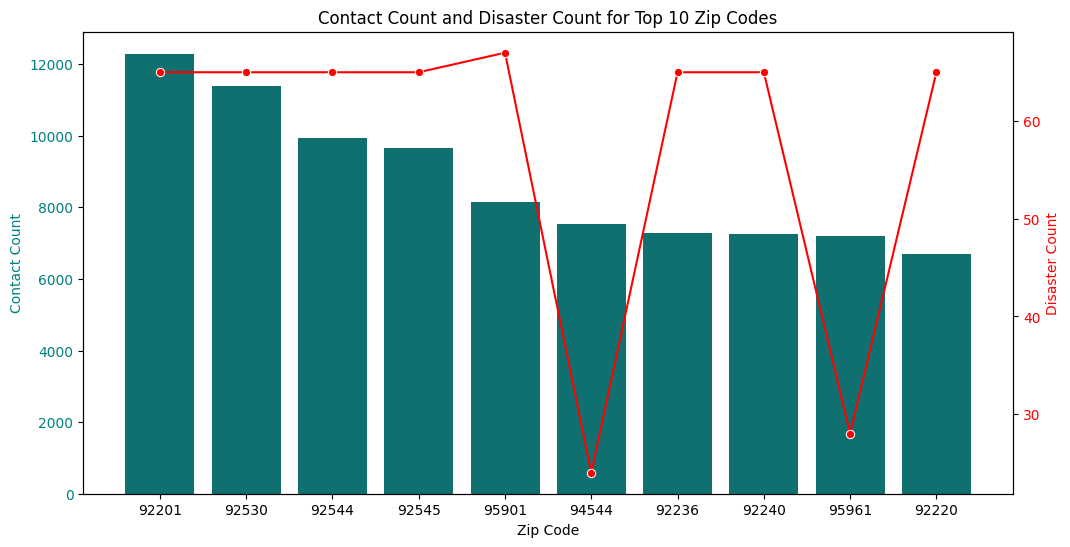

In [225]:
Cleaned_df['Zip'] = Cleaned_df['Zip'].astype(str)
filtered_fema_cleaned['ZIP_STRING'] = filtered_fema_cleaned['ZIP_STRING'].astype(str)


top_10_zips = Cleaned_df['Zip'].value_counts().head(10).index.tolist()
disaster_counts_top_zips = filtered_fema_cleaned[filtered_fema_cleaned['ZIP_STRING'].isin(top_10_zips)]
disaster_counts_top_zips = disaster_counts_top_zips.groupby('ZIP_STRING')['disaster_count'].sum().reset_index()

contact_counts_top_zips = Cleaned_df['Zip'].value_counts().head(10).reset_index()
contact_counts_top_zips.columns = ['ZIP_STRING', 'contact_count']
combined_zip_data = pd.merge(contact_counts_top_zips, disaster_counts_top_zips, on='ZIP_STRING', how='left').fillna(0)
combined_zip_data = combined_zip_data.sort_values(by='contact_count', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='ZIP_STRING', y='contact_count', data=combined_zip_data, color='teal', ax=ax1)
ax1.set_xlabel('Zip Code')
ax1.set_ylabel('Contact Count', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_title('Contact Count and Disaster Count for Top 10 Zip Codes')


ax2 = ax1.twinx()
sns.lineplot(x='ZIP_STRING', y='disaster_count', data=combined_zip_data, marker='o', color='red', ax=ax2)
ax2.set_ylabel('Disaster Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.show()

# For Tableau

In [98]:
# Ensure Zip columns are strings, stripped, and padded to 5 digits
Cleaned_df['Zip'] = Cleaned_df['Zip'].astype(str).str.strip().str.zfill(5)
filtered_fema_cleaned['ZIP_STRING'] = filtered_fema_cleaned['ZIP_STRING'].astype(str).str.strip().str.zfill(5)

# Merge datasets on Zip
merged_df = pd.merge(Cleaned_df, filtered_fema_cleaned, left_on='Zip', right_on='ZIP_STRING', how='left')

# Select relevant columns for dashboards
columns_to_keep = [
    'Zip', 'FIPS_COUNTY_CODE', 'disaster_count', 'County', 'Age', 'Gender', 'Ethnicity',
    'On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_',
    'Can_we_sign_you_up_for_Emergency_Service_Notifications_',
    'Have_you_seen__heard__or_received_any_information_about_how_to_prepare_for_or_recover_from_a_natural_disaster_',
    'Where_did_you_see_or_hear_this_information_',
    'Which_of_the_following_things_would_help_you_feel_more_prepared_for_a_natural_disaster_'
]

# Filter columns (handle missing columns)
columns_to_keep = [col for col in columns_to_keep if col in merged_df.columns]
merged_df = merged_df[columns_to_keep]

# Handle missing values
merged_df['disaster_count'] = merged_df['disaster_count'].fillna(0).astype(int)
merged_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'] = merged_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'].fillna(0)

# Export to CSV for Tableau
merged_df.to_csv('merged_data_for_tableau.csv', index=False)
print("Merged dataset exported as 'merged_data_for_tableau.csv'")



Merged dataset exported as 'merged_data_for_tableau.csv'


In [100]:
merged_df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345429 entries, 0 to 345428
Data columns (total 12 columns):
 #   Column                                                                                                          Non-Null Count   Dtype  
---  ------                                                                                                          --------------   -----  
 0   Zip                                                                                                             345429 non-null  object 
 1   FIPS_COUNTY_CODE                                                                                                345403 non-null  Int64  
 2   disaster_count                                                                                                  345429 non-null  int64  
 3   County                                                                                                          345429 non-null  object 
 4   Age                             

In [ ]:
Cleaned_df.to_csv('Cleaned_df_for_tableau.csv', index=False)

# Recommendations Based on Findings


Recommendation 1


Percentage of each ethnic group who said 'Yes' to Emergency Service Notifications:
| Ethnicity   | count    |
|:------------|:---------|
| BB          | 1.53846  |
| XX          | 1.51303  |
| Unknown     | 1.43437  |
| NN          | 1.39037  |
| HH          | 1.36857  |
| DD          | 1.29032  |
| YY          | 1.22411  |
| EE          | 1.22019  |
| AR          | 1.14504  |
| II          | 1.13068  |
| JJ          | 1.12683  |
| PP          | 1.02302  |
| SS          | 0.983021 |
| OO          | 0.956938 |
| KK          | 0.87146  |
| ZZ          | 0.78125  |
| CC          | 0.774562 |
| GG          | 0.735294 |
| AS          | 0.73258  |
| WW          | 0.688073 |
| LL          | 0.634518 |
| MM          | 0.514801 |
| VV          | 0.483092 |
| FF          | 0.440125 |
| RR          | 0        |
| TT          | 0        |
| UU          | 0        |


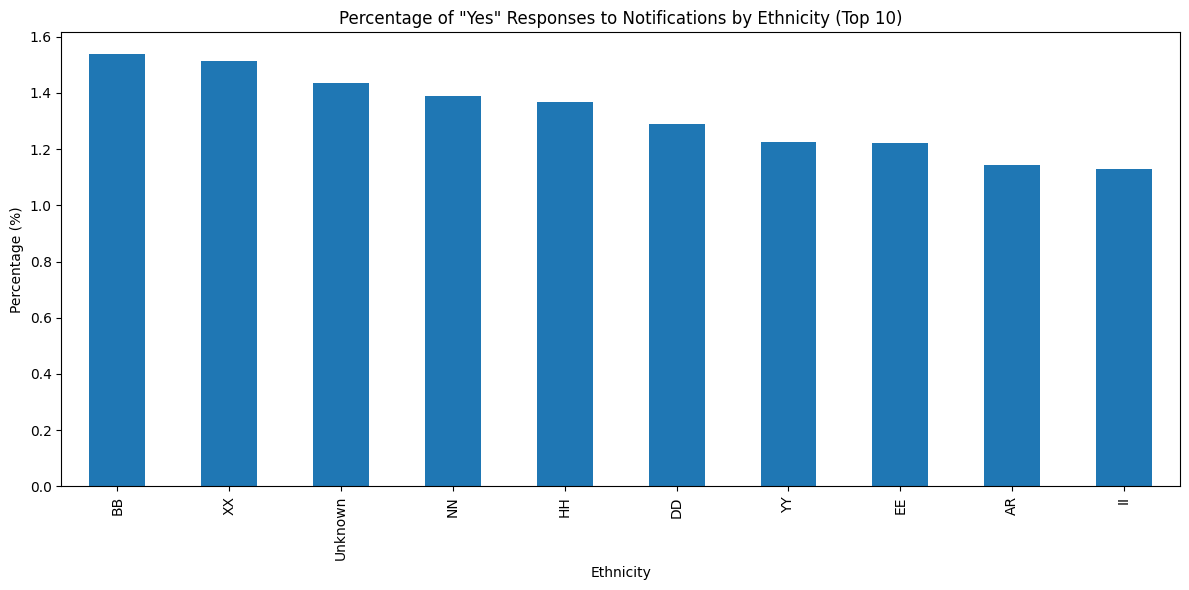

ethnicity_signup_percentage has been exported as 'ethnicity_signup_percentage_for_tableau.csv'


In [220]:
signup_yes_by_ethnicity = Cleaned_df[
    Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'] == 'Yes'
]['Ethnicity'].value_counts()

total_reached_by_ethnicity = Cleaned_df[
    Cleaned_df['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].notna()
]['Ethnicity'].value_counts()

ethnicity_signup_percentage = (signup_yes_by_ethnicity / total_reached_by_ethnicity).fillna(0) * 100

print("\nPercentage of each ethnic group who said 'Yes' to Emergency Service Notifications:")
print(ethnicity_signup_percentage.sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

top_n_viz = 10
ethnicity_signup_percentage.sort_values(ascending=False).head(top_n_viz).plot(kind='bar', figsize=(12, 6))
plt.title(f'Percentage of "Yes" Responses to Notifications by Ethnicity (Top {top_n_viz})')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Recommendations1
ethnicity_signup_percentage.to_csv('ethnicity_signup_percentage.csv', index=False)
print("ethnicity_signup_percentage has been exported as 'ethnicity_signup_percentage_for_tableau.csv'")



Recommendation 2

In [206]:
low_preparedness_df = Cleaned_df[
    (Cleaned_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'] <= 3) &
    (Cleaned_df['On_a_scale_of_1_5__how_prepared_do_you_feel_for_an_emergency_'] > 0)
]


zip_low_preparedness = low_preparedness_df.groupby('Zip')['Row_Count'].sum()
zip_total = Cleaned_df.groupby('Zip')['Row_Count'].sum()
low_preparedness_pct = (zip_low_preparedness / zip_total * 100).round(6).fillna(0)
low_preparedness_df = pd.DataFrame({
    'Low_Preparedness_Percentage': low_preparedness_pct
}).sort_values('Low_Preparedness_Percentage', ascending=False).head(10)  # Top 10 ZIPs


print("\nPercentage of Contacts with Low Preparedness (Score <= 3) by ZIP Code (Top 10):")
print(low_preparedness_df.to_string(index=True))


Percentage of Contacts with Low Preparedness (Score <= 3) by ZIP Code (Top 10):
       Low_Preparedness_Percentage
Zip                               
95910                    25.000000
95221                    16.666667
96078                     7.142857
96074                     5.263158
95629                     3.448276
95970                     2.898551
96015                     2.857143
96046                     2.857143
96092                     2.500000
95232                     2.500000


In [208]:
#Which were the highest zip conversion rates whos signup count >100

zip_signup_counts = Cleaned_df.groupby('Zip')['Can_we_sign_you_up_for_Emergency_Service_Notifications_'].value_counts().unstack().fillna(0)

zip_signup_counts['Total_Contacts'] = zip_signup_counts.sum(axis=1)

zip_signup_counts_filtered = zip_signup_counts[zip_signup_counts['Total_Contacts'] > 100].copy()


zip_signup_counts_filtered['Signup_Rate'] = (zip_signup_counts_filtered['Yes'] / zip_signup_counts_filtered['Total_Contacts'] * 100).round(2)


highest_zip_conversion_rates = zip_signup_counts_filtered.sort_values(by='Signup_Rate', ascending=False)


print("\nHighest ZIP Conversion Rates (Signup Count > 100):")
print(highest_zip_conversion_rates[['Total_Contacts', 'Yes', 'Signup_Rate']].to_markdown(numalign="left", stralign="left"))



Highest ZIP Conversion Rates (Signup Count > 100):
| Zip   | Total_Contacts   | Yes   | Signup_Rate   |
|:------|:-----------------|:------|:--------------|
| 95321 | 151              | 13    | 8.61          |
| 95383 | 166              | 13    | 7.83          |
| 95370 | 1292             | 73    | 5.65          |
| 96118 | 112              | 6     | 5.36          |
| 96027 | 207              | 11    | 5.31          |
| 96073 | 733              | 38    | 5.18          |
| 96020 | 272              | 14    | 5.15          |
| 96028 | 189              | 9     | 4.76          |
| 96055 | 477              | 22    | 4.61          |
| 96122 | 528              | 24    | 4.55          |
| 96021 | 1544             | 70    | 4.53          |
| 96134 | 112              | 5     | 4.46          |
| 95327 | 282              | 12    | 4.26          |
| 94515 | 429              | 17    | 3.96          |
| 96069 | 131              | 5     | 3.82          |
| 96024 | 147              | 5     | 3.4       

In [213]:
low_preparedness_df = low_preparedness_df.rename(columns={'Zip': 'Zip'})

merged_preparedness_signup = pd.merge(
    low_preparedness_df,
    highest_zip_conversion_rates[['Signup_Rate']],
    left_index=True,
    right_index=True,
    how='left'
)

merged_preparedness_signup['Signup_Rate'] = merged_preparedness_signup['Signup_Rate'].fillna(0)

merged_preparedness_signup_sorted = merged_preparedness_signup.sort_values(by='Signup_Rate', ascending=False)

print("\nMerged Low Preparedness and Highest ZIP Conversion Rates, Sorted by Signup Rate (Descending):")
print(merged_preparedness_signup_sorted.to_string())


Merged Low Preparedness and Highest ZIP Conversion Rates, Sorted by Signup Rate (Descending):
   index    Zip  Low_Preparedness_Percentage  Signup_Rate
0      0  95910                    25.000000         8.61
1      1  95221                    16.666667         7.83
2      2  96078                     7.142857         5.65
3      3  96074                     5.263158         5.36
4      4  95629                     3.448276         5.31
5      5  95970                     2.898551         5.18
6      6  96015                     2.857143         5.15
7      7  96046                     2.857143         4.76
8      8  96092                     2.500000         4.61
9      9  95232                     2.500000         4.55


Comapring the zips with the Zip in merged_fema_disaster who have disaster_count>10.

In [219]:

merged_fema_disaster_high_disaster = merged_fema_disaster[merged_fema_disaster['disaster_count'] > 10].copy()


merged_fema_disaster_high_disaster['ZIP_STRING'] = merged_fema_disaster_high_disaster['ZIP_STRING'].astype(str)


merged_high_disaster_comparison = pd.merge(
    merged_fema_disaster_high_disaster[['ZIP_STRING', 'disaster_count']],
    merged_preparedness_signup_sorted.reset_index(),
    left_on='ZIP_STRING',
    right_on='Zip',
    how='inner'
)


merged_high_disaster_comparison = merged_high_disaster_comparison.drop(columns=['Zip'])


merged_high_disaster_comparison = merged_high_disaster_comparison.rename(columns={'ZIP_STRING': 'Zip'})


final_comparison_df = merged_high_disaster_comparison[['Zip', 'disaster_count', 'Low_Preparedness_Percentage', 'Signup_Rate']]

print("\nZIP Codes with > 10 Disasters, along with Low Preparedness and Signup Rate:")
print(final_comparison_df.head())


final_comparison_df.to_csv('final_comparison_df_for_tableau.csv', index=False)
print("final_comparison_df exported as 'final_comparison_df_for_tableau.csv'")


ZIP Codes with > 10 Disasters, along with Low Preparedness and Signup Rate:
     Zip  disaster_count  Low_Preparedness_Percentage  Signup_Rate
0  95221              22                    16.666667         7.83
1  95232              22                     2.500000         4.55
2  95629              21                     3.448276         5.31
3  95629              27                     3.448276         5.31
4  95910              16                    25.000000         8.61
final_comparison_df exported as 'final_comparison_df_for_tableau.csv'
